# Lecture 12

* Client-server model
* Applications and interfaces
* API
* Bringing it all together

Any questions about the lecture?

# Practical 12: Widgets

# Timing

* 9.00-9.15: Introduce widgets and interact
* 9.15-9.25: Assignment 1
* 9.25-9.35: Show/discuss solution
* 9.35-9.50: Remainder part 2
* 9.50-10.10: Assignment 2
* 10.10-10.20: Show/discuss solution
* 10.20-10.30: Break
* 10.30-10.40: Show input and output widgets
* 10.40-10.55: Assignment 3 and show solution
* 10.55-11.05: Show layout widgets and templates
* 11.05-11.45: Assignment 4 and 5
* 11.45-12.00: Show and discuss solution

# Part 1 - What are widgets?

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.


*Eventful*, let's see what that means:

Wikipedia says: In programming and software design, an event is an action or occurrence recognized by software...that may be handled by the software. Computer events can be generated or triggered by the system, by the user, or in other ways. ... A source of events includes the user, who may interact with the software through the computer's peripherals - for example, by typing on the keyboard. Another source is a hardware device such as a timer. Software can also trigger its own set of events into the event loop, e.g. to communicate the completion of a task. Software that changes its behavior in response to events is said to be event-driven, often with the goal of being interactive. 

<br>

**What can widgets be used for?**

You can use widgets to build interactive GUIs (Graphical User Interface) for your notebooks.

<br>

**What do widgets look like?**

Here's some examples...

An integer slider



In [1]:
import ipywidgets as widgets

In [2]:
widgets.IntSlider(0, 10)

IntSlider(value=10, min=10)

A dropdown list

In [3]:
widgets.Dropdown(options=['a', 'b', 'c'])

Dropdown(options=('a', 'b', 'c'), value='a')

A checkbox

In [4]:
widgets.Checkbox(
    value=False,
    description='Check me'
)

Checkbox(value=False, description='Check me')

# Part 2 - Widgets with interact

## `interact` function

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that triples its argument, `x`.

In [5]:
from ipywidgets import interact

In [6]:
def f(x):
  return 3 * x

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter.

In [7]:
interact(f, x=10);
# Note that we're passing the function f as parameter to the interact function.
# When we pass a function as parameter, we don't use the brackets.
# f without brackets refers to the function object.
# f() with brackets 'calls' the function, which is what we do when we want to use whatever the function does.

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

When you move the slider, the function is called, and the return value is printed.


**Changing the data type**

If you pass `True` or `False`, `interact` will generate a checkbox:

In [8]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

If you pass a floating point number, `interact` will generate a FloatSlider

In [9]:
interact(f, x=10.0);

interactive(children=(FloatSlider(value=10.0, description='x', max=30.0, min=-10.0), Output()), _dom_classes=(…

If you pass a string, `interact` will generate a `Text` field.

In [10]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

In [11]:
interact(f, x=['NLD', 'GBR', 'BEL']);

interactive(children=(Dropdown(description='x', options=('NLD', 'GBR', 'BEL'), value='NLD'), Output()), _dom_c…

In [12]:
interact(f,
         x=[('Netherlands', 'NLD'),
            ('Belgium', 'BEL'),
            ('United Kingdom', 'GBR'),
            ('United States', 'USA')]);

interactive(children=(Dropdown(description='x', options=(('Netherlands', 'NLD'), ('Belgium', 'BEL'), ('United …

**One more example: `interact` steps**

1. Write a function which takes 1 or more parameters/inputs
2. Pass that function and its parameters to `interact` to automatically create widgets which allow you to explore the function output interactively.

In [13]:
def greet(name):
  return f'Hi {name}!'

In [14]:
interact(greet, name='everyone');

interactive(children=(Text(value='everyone', description='name'), Output()), _dom_classes=('widget-interact',)…

## Assignment 1: Interactive BMI calculator

1. Write a function called `calc_bmi` which takes as parameters `weight_kg` and `height_cm`, and returns the bmi.
2. Pass that function to `interact` and set default values for `weight_kg` and `height_cm`.

In [15]:
# solution 1.1
def calc_bmi(weight_kg, height_cm):
  calc_bmi= (weight_kg)/((height_cm)**2)
  return calc_bmi

In [16]:
# solution 1.2
interact(calc_bmi, weight_kg=85, height_cm=1.72);

interactive(children=(IntSlider(value=85, description='weight_kg', max=255, min=-85), FloatSlider(value=1.72, …

## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [17]:
def h(p, q):
  return (p, q)

When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [18]:
from ipywidgets import fixed
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

Notice that a slider is only produced for `p` as the value of `q` is fixed.

**Another example, using the covid dataset**

We load the entire covid dataset and save the dataframe in variable `covid`

In [19]:
import pandas as pd
covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", parse_dates=['date'])
covid.shape

(158630, 67)

In [20]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Then we write a function which selects only those rows belonging to a specific country, as specified by its `iso_code`

In [21]:
# interact step 1: define a function
def select_country_data(iso_code, df):
  '''Takes iso_code and df as input. Returns the rows in
  df belonging to country with iso_code'''
  
  return df.loc[df['iso_code'] == iso_code, ]

We want to choose the `iso_code` interactively, but we don't need to choose the dataframe each time the function is called. Therefore, we can fix that parameter.

In [22]:
# interact step 2: pass that function and its parameters to interact
# this time with one parameter fixed, so no widget is created for df
interact(select_country_data, iso_code='NLD', df=fixed(covid));

interactive(children=(Text(value='NLD', description='iso_code'), Output()), _dom_classes=('widget-interact',))

## Widget abbreviations

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of `[-10, +3*10]`. In this case, `10` is an *abbreviation* for an actual slider widget:

```python
IntSlider(min=-10, max=30, step=1, value=10)
```

In fact, we can get the same result if we pass this `IntSlider` as the keyword argument for `x`:

In [23]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

This examples clarifies how `interact` processes its keyword arguments:

1. If the keyword argument is a `Widget` instance with a `value` attribute, that widget is used. Any widget with a `value` attribute can be used, even custom ones.
2. Otherwise, the value is treated as a *widget abbreviation* that is converted to a widget before it is used.

The following table gives an overview of different widget abbreviations:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`['orange','apple']` or `[('one', 1), ('two', 2)]`</td><td>Dropdown</td></tr>
</table>
Note that a dropdown is used if a list or a list of tuples is given (signifying discrete choices), and a slider is used if a tuple is given (signifying a range).

You have seen how the checkbox and text widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed `(min, max)`, an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of `1` is used.

In [24]:
interact(f, x=(0, 10));

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

The step size can be changed by passing a third element in the tuple.

In [25]:
interact(f, x=(0, 10, 2));

interactive(children=(IntSlider(value=4, description='x', max=10, step=2), Output()), _dom_classes=('widget-in…

Similar for `FloatSlider`

In [26]:
interact(f, x=(0, 10, 0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

## Assignment 2: Widget abbrevations

**Exercise 1**:
* Take the solution from assignment 1 in the cell below
* Adjust the code so the widgets get sensible ranges (min-max) and step sizes.

In [27]:
# solution assignment 1
def calc_bmi(weight_kg, height_cm):
  return weight_kg / (height_cm ** 2)

interact(calc_bmi, weight_kg=80, height_cm=1.82);

interactive(children=(IntSlider(value=80, description='weight_kg', max=240, min=-80), FloatSlider(value=1.82, …

In [28]:
# solution 2.1
interact(calc_bmi, weight_kg=(2, 100, 0.1), height_cm=(0.3, 2.1, 0.01));

interactive(children=(FloatSlider(value=51.0, description='weight_kg', min=2.0), FloatSlider(value=1.19, descr…

**Exercise 2**

* Take the covid example where the input widget is Text
* Adjust the code to create a dropdown menu of iso_codes, such as 'NLD', 'BEL', 'GBR', 'USA'
* Adjust the code further to show labels in the dropdown, such as 'Netherlands', 'Belgium' etc. Do **not** change the implementation of `select_country_data`

In [29]:
# input widget is Text
interact(select_country_data, iso_code='NLD', df=fixed(covid));

interactive(children=(Text(value='NLD', description='iso_code'), Output()), _dom_classes=('widget-interact',))

In [30]:
# solution 2.2 iso_code dropdown 
interact(select_country_data, iso_code=['NLD','BEL','GBR','USA'], df=fixed(covid));

interactive(children=(Dropdown(description='iso_code', options=('NLD', 'BEL', 'GBR', 'USA'), value='NLD'), Out…

In [31]:
# solution 2.2 label-value dropdown
interact(select_country_data, iso_code=[('Netherlands', 'NLD'),
                                        ('Belgium', 'BEL'),
                                        ('United Kingdom', 'GBR'),
                                        ('United States', 'USA')], df=fixed(covid));

interactive(children=(Dropdown(description='iso_code', options=(('Netherlands', 'NLD'), ('Belgium', 'BEL'), ('…

# Part 3 - Widgets: Controlling UI components

There's a large variety of widgets. Let's have a look at some we haven't seen.

For this practical, we divide them into 3 categories:
1. Input widgets
2. Output widgets
3. Container/layout widgets

## Input widgets

This [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) shows an overview of all available widgets.

There's the common `IntSlider`, `FloatSlider` etc which we have already seen, but also some more complicated ones.

For example, a `DatePicker`

In [32]:
widgets.DatePicker(
    description='Pick a Date'
)

DatePicker(value=None, description='Pick a Date')

A `ColorPicker`

In [33]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

colorpicker

ColorPicker(value='blue', description='Pick a color')

In [34]:
print(colorpicker.value)

blue


A `Play` (Animation) widget

In [35]:
play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

## Output widgets

The `Output` widget can display all sorts of output. You can append output directly to an output widget, or clear it programmatically.

In [36]:
out = widgets.Output(layout={'border': '1px solid cyan'})
out

Output(layout=Layout(border='1px solid cyan'))

After the widget is created, direct output to it using a context manager. You can print text to the output area:

In [37]:
with out:
  print('Hello world!')

We can clear the output by either using `IPython.display.clear_output` within the context manager, or we can call the widget's `clear_output` method directly.


In [38]:
out.clear_output()

NB: you have probably not seen this structure before:

```
with out:
  print('something')
```

This is called a *context manager* in python. They can also be used for reading and writing to files.

```
with open('filename.txt', 'w') as file_obj:
  file_obj.write('save this text to the file')
```

Rich output can also be directed to the output area. Anything which displays nicely in a Jupyter notebook will also display well in the `Output` widget.

In [39]:
from IPython.display import YouTubeVideo
with out:
    display(YouTubeVideo('8IYbdshUd9c'))

out

Output(layout=Layout(border='1px solid cyan'))

We can even display complex data types, such as nested widgets, in an output widget.

In [40]:
with out:
  print('An input widget in an output widget!')
  display(widgets.IntSlider())

## Assignment 3: Output practice

1. Create an output object called `my_output`
2. Pick a fancy border color if you like, instead of cyan
3. Write some text to the output element, or embed a youtube video
4. Display `my_output` by putting it on the last line of the cell

In [41]:
# solution 3
my_output= widgets.Output(layout={'border': '1px solid green'})

#from IPython.display import YouTubeVideo not needed as it was already imported
with my_output:
    display(YouTubeVideo('Gc71AmT_b2k'))
    print('This is one of my favorite songs! Can you rate it from 0 to 10?')
    display(widgets.IntSlider(0, 0, 10, 1))

my_output

Output(layout=Layout(border='1px solid green'))

## Output widgets as the foundation for interact

The output widget forms the basis of how interact and related methods are implemented. It can also be used by itself to create rich layouts with widgets and code output. One simple way to customize how an interact UI looks is to use the `interactive_output` function to hook controls up to a function whose output is captured in the returned output widget. In the next example, we stack the controls vertically and then put the output of the function to the right.

In [42]:
# define 3 widgets
wa = widgets.IntSlider(description='widget a')
wb = widgets.IntSlider(description='widget b')
wc = widgets.IntSlider(description='widget c')

# the function prints the individual widget values and their product
def g(a, b, c):
    print(f'{a}*{b}*{c}={a*b*c}')

# the dictionary reflects the keyword arguments for the function
# keyword arguments are parameters like a=1, where a is the keyword and 1 is the value
# The keywords for the function are the keys of the dictionary, and listed as strings e.g. ('a')
# The values in the dictionary are a reference to the widgets.
# so the line below calls g(wa, wb, wc)
out = widgets.interactive_output(g, {'a': wa, 'b': wb, 'c': wc})

# the user interface consists of the 3 widgets
ui = widgets.VBox([wa, wb, wc])

# display the ui and the output in a horizontal layout
widgets.HBox([ui, out])

**The benefits of using `interactive_output`**

* More control over layout
* Control over widgets (is also possible with `interact()` but that might turn into cluttered code)

## Layout widgets

Layout widgets are used to hold other widgets, called children. Each has a `children` property that may be set either when the widget is created or later.

In [43]:
a = widgets.IntSlider(description='a')
b = widgets.FloatSlider(description='b')
c = widgets.Dropdown(options=['x', 'y', 'z'], description='c')
d = widgets.SelectMultiple(options=['NLD', 'BEL', 'GBR', 'USA'], description='d')

Horizontal box

In [44]:
widgets.HBox([a, b, c, d])

Vertical box

In [45]:
widgets.VBox([a, b, c, d])

You can nest these, e.g. Vertical box in Horizontal box

In [46]:
widgets.HBox([widgets.VBox([a, b, c]), d])

## Layout templates

Ipywidgets also has several predefined layout templates. They are described in [the documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html).

Two useful layout templates we'll illustrate shortly are the:

**1. The `TwoByTwoLayout`**

In [47]:
from ipywidgets import TwoByTwoLayout

TwoByTwoLayout(top_left=a,
               top_right=b,
               bottom_left=c,
               bottom_right=d)

TwoByTwoLayout(children=(IntSlider(value=0, description='a', layout=Layout(grid_area='top-left')), FloatSlider…

**2. AppLayout**

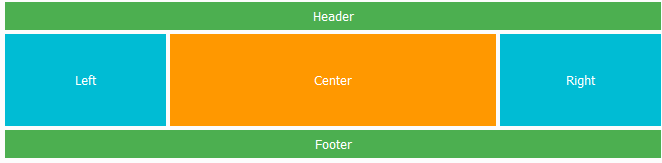

In [48]:
from ipywidgets import AppLayout

header_output = widgets.Output(layout={'border': '1px solid orange'})
with header_output:
  print('# A header text')

footer_output = widgets.Output(layout={'border': '1px solid red'})
with footer_output:
  print('Footer text')

AppLayout(header=header_output,
          left_sidebar=a,
          center=b,
          right_sidebar=c,
          footer=footer_output)

AppLayout(children=(Output(layout=Layout(border='1px solid orange', grid_area='header')), Output(layout=Layout…

## Assignment 4: Layout practice

* Look at the 3 widgets defined in the cell below.
* Use nested VBox and HBox in such a way that the country dropdown is listed in the top row, and year and month next to each other in the bottom row. Like so:

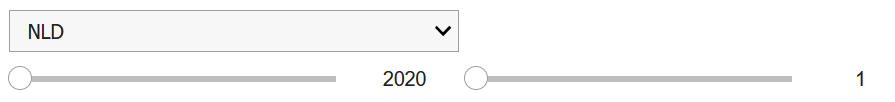

In [49]:
# dropdown widget to select country
country = widgets.Dropdown(options=['NLD', 'BEL', 'USA', 'GBR'],
                             value='NLD')

# IntSlider widget to select year
year = widgets.IntSlider(min=2020, max=2022, step=1, value=2020)

# IntSlider widget to select month
month = widgets.IntSlider(min=1, max=12, step=1, value=1)

In [50]:
# solution 4
widgets.HBox((widgets.VBox([country, year]), month))

## Assignment 5: An interactive data visualization

In this exercise you will build a covid data explorer step by step. **Make sure to read each step in the assignment well!**

1. Create a function called `visualize_country_data`, which takes `iso_code` and `df` as parameters and displays an altair chart object. See the comments in the code cell below for a step by step description of what you should implement.



In [51]:
# you will use this function in the next cell
def select_country_data(iso_code, df):
  '''Takes iso_code and df as input. Returns the rows in
  df belonging to country with iso_code'''
  
  return df.loc[df['iso_code'] == iso_code, ]

In [52]:
# solution 5.1
import altair as alt

def visualize_country_data(iso_code, df):

  # 1. use the select_country_data function to select rows from df
  #  with iso_code
  ### YOUR CODE HERE

  visualized_data= select_country_data(iso_code, df)

  # 2. use altair to create a chart (save it as variable called chart)
  # the chart should be:
  # using the subset of data selected in line above
  # a line chart,
  # with 'yearmonth(date):T' on x-axis and
  # max of total_vaccinations on y axis
  # showing location in the tooltip
  ### YOUR CODE HERE TO CREATE chart
  chart = alt.Chart(visualized_data).mark_line().encode(
    x= 'yearmonth(date):T', 
    y= 'max(total_vaccinations):Q',
    tooltip= 'location'
  )
  # display the chart object you created
  display(chart)

  # NB: most commonly a function would 'return' something.
  #  Yet, this gives an issue later on when using interactive_output.
  #  Therefore, we use display(chart) instead of return chart here.


**TEST** your function using the cell below

In [53]:
# TEST the function! Do not change this cell!

# you should see:
# A chart!
# With an x-axis from 2020 until 2022
# Showing a line with an upward trend
visualize_country_data('NLD', covid)

alt.Chart(...)

2. Use `interact`, from part 2 of the practical, to make the chart interactive. Allow the user to select a country or iso_code from a dropdown widget, and let your `visualize_country_data` function plot the selected country's data.


In [54]:
# solution 5.2
interact(visualize_country_data, iso_code= ['NLD', 'BEL', 'GBR', 'USA'], df=fixed(covid));


interactive(children=(Dropdown(description='iso_code', options=('NLD', 'BEL', 'GBR', 'USA'), value='NLD'), Out…

3. 
  1. Recreate the above using `widgets.interactive_output`, as in part 3 of the practical: *Output widgets as the foundation for interact.*
  2. Choose a layout or layout template and arrange the elements of 3a horizontally (dropdown next to chart).


In [55]:
### 5.3.1
# TODO: define dropdown widget
### YOUR CODE HERE

# function is already defined in 5.1, so is done.

# TODO: define the interactive_output element (with function and keyword arguments)
### YOUR CODE HERE

# ui is just one widget, does not have to be saved separately as ui variable.

### 5.3.2
# TODO: put the widget and output in horizontal layout
### YOUR CODE HERE

4. Copy your solution to the cell below and then extend what you build in any of the following ways:
  1. Can you find a programmatic way to list all unique iso_codes in the dropdown?
  2. Add a widget to select the variable on the y-axis. Let the user choose between `total_cases`, `total_deaths`, and `total_vaccinations`. Think carefully at which places you have to make changes in your code to make the change appear in the plot.
  3. Change the dropdown widget into a widget which allows to select multiple values ([search the documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)) and add `location` to `color` encoding in the visualize function. If this works out, consider changing the variables to their normalized variants ('per_million', 'per_hundred'), to facilitate comparison between countries.
  4. How would you like to extend this 'app' further?

In [56]:
### solution 5.4.1


In [57]:
### solution 5.4.2


In [58]:
### solution 5.4.3


# Reference: Scipy Jupyter Interactive Widget Ecosystem

This practical is based on the [ipywidgets documentation](https://ipywidgets.readthedocs.io/en/latest/index.html) and on the 2020 Scipy workshop "Jupyter Interactive Widget Ecosystem" ([github repository](https://github.com/jupyter-widgets/tutorial), [youtube video](https://www.youtube.com/watch?v=8IYbdshUd9c))





